<a href="https://colab.research.google.com/github/sachsac/Astrology_and_Birth_Months/blob/main/Graphing_Project_Astrology_and_Birth_Months.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
birthday_df = pd.read_excel('/content/drive/MyDrive/Coding Dojo/data set/US_births_1994-2014_astrology.xlsx')
birthday_df.tail(5)

,year,month,date_of_month,day_of_week,births,astrological_sign
7665,2014,12,27,6,8656,Capricorn
7666,2014,12,28,7,7724,Capricorn
7667,2014,12,29,1,12811,Capricorn
7668,2014,12,30,2,13634,Capricorn
7669,2014,12,31,3,11990,Capricorn


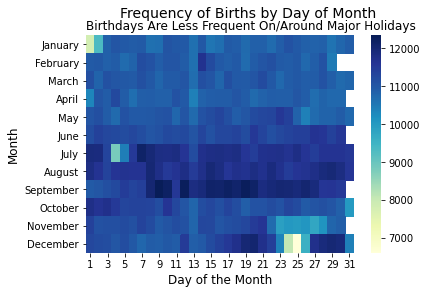

In [295]:
birthday_map = pd.pivot_table(birthday_df, values= 'births',
                              index = ['month'],
                              columns = 'date_of_month')
birthday_map.index = pd.CategoricalIndex(birthday_map.index, categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
birthday_map.sort_index(axis=0, ascending=True, inplace=True)
sns.heatmap(birthday_map, cmap="YlGnBu");
plt.ylabel('Month', fontsize = 12)
plt.xlabel('Day of the Month', fontsize = 12)
plt.suptitle('Frequency of Births by Day of Month', fontsize = 14)
plt.title('Birthdays Are Less Frequent On/Around Major Holidays', loc ='left');

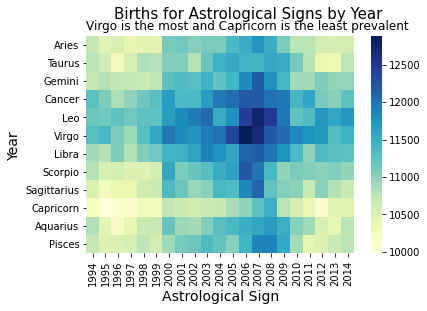

In [296]:
sign_map = pd.pivot_table(birthday_df, values= 'births',
                              index = ['astrological_sign'],
                              columns = 'year')
sign_map.index = pd.CategoricalIndex(sign_map.index, categories = ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'])
sign_map.sort_index(axis=0, ascending=True, inplace=True)
sns.heatmap(sign_map, cmap="YlGnBu")
plt.ylabel('Year', fontsize = 14)
plt.xlabel('Astrological Sign', fontsize = 14)
plt.suptitle('Births for Astrological Signs by Year', fontsize = 15)
plt.title('Virgo is the most and Capricorn is the least prevalent', loc = 'left');

In [ ]:
birthday_df['month'] = birthday_df['month'].replace([1], 'January')
birthday_df['month'] = birthday_df['month'].replace([2], 'February')
birthday_df['month'] = birthday_df['month'].replace([3], 'March')
birthday_df['month'] = birthday_df['month'].replace([4], 'April')
birthday_df['month'] = birthday_df['month'].replace([5], 'May')
birthday_df['month'] = birthday_df['month'].replace([6], 'June')
birthday_df['month'] = birthday_df['month'].replace([7], 'July')
birthday_df['month'] = birthday_df['month'].replace([8], 'August')
birthday_df['month'] = birthday_df['month'].replace([9], 'September')
birthday_df['month'] = birthday_df['month'].replace([10], 'October')
birthday_df['month'] = birthday_df['month'].replace([11], 'November')
birthday_df['month'] = birthday_df['month'].replace([12], 'December')
birthday_df

,year,month,date_of_month,day_of_week,births,astrological_sign
0,1994,January,1,6,8096,Capricorn
1,1994,January,2,7,7772,Capricorn
2,1994,January,3,1,10142,Capricorn
3,1994,January,4,2,11248,Capricorn
4,1994,January,5,3,11053,Capricorn
...,...,...,...,...,...,...
7665,2014,December,27,6,8656,Capricorn
7666,2014,December,28,7,7724,Capricorn
7667,2014,December,29,1,12811,Capricorn
7668,2014,December,30,2,13634,Capricorn


In [ ]:
birthday_df.groupby(['month'])['births'].sum()
#ensuring that our barplot matches our expected values

month
April        6850733
August       7624626
December     7155101
February     6511697
January      6979322
July         7527284
June         7122586
March        7147368
May          7175367
November     6884173
October      7293822
September    7440659
Name: births, dtype: int64

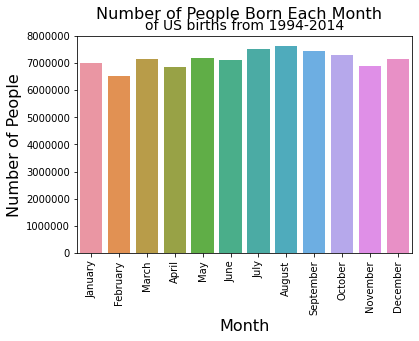

In [282]:
monthly_births = birthday_df.groupby(['month'])['births'].sum()
sns.barplot(x = monthly_births.index, 
            y = monthly_births.values,
            order= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation = 90)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of People', fontsize = 16)
plt.title('of US births from 1994-2014', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.suptitle('Number of People Born Each Month', fontsize = 16);

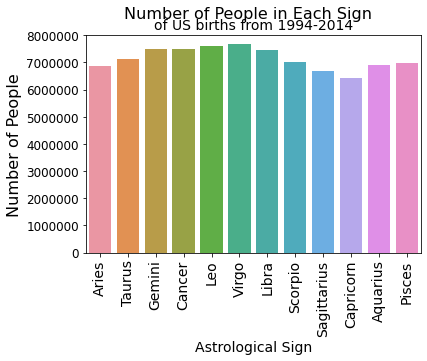

In [284]:
sign_births = birthday_df.groupby(['astrological_sign'])['births'].sum()
signs_bar = sns.barplot(x = sign_births.index,
                        y = sign_births.values,
                        order= ['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'])
plt.xticks(rotation = 90, fontsize=14)
plt.ylim(0, 8000000)
plt.yticks(fontsize = 12)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Astrological Sign', fontsize = 14)
plt.ylabel('Number of People', fontsize = 16)
plt.suptitle('Number of People in Each Sign', fontsize = 16);
plt.title('of US births from 1994-2014', fontsize=14);

In [ ]:
birthday_df.groupby(['astrological_sign'])['births'].sum()
#ensuring that our barplot matches our expected values

astrological_sign
Aquarius       6897158
Aries          6873015
Cancer         7487969
Capricorn      6427467
Gemini         7502640
Leo            7607411
Libra          7439367
Pisces         6972168
Sagittarius    6684037
Scorpio        7010403
Taurus         7140704
Virgo          7670399
Name: births, dtype: int64